## Construya un modelo de clasificación binaria que permita identificar si  un tumor es maligno o benigno a partir de mediciones obtenidas en imágenes digitales de tejidos mamarios.

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target

# Convertir a etiquetas: 0 = maligno, 1 = benigno
df['diagnosis'] = df['diagnosis'].map({0: 'maligno', 1: 'benigno'})

In [ ]:
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,maligno
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,maligno
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,maligno
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,maligno
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,maligno


In [ ]:
print("\nDimensiones del dataset:", df.shape)
print("\nDistribución de diagnóstico:")
print(df['diagnosis'].value_counts())


Dimensiones del dataset: (569, 31)

Distribución de diagnóstico:
diagnosis
benigno    357
maligno    212
Name: count, dtype: int64


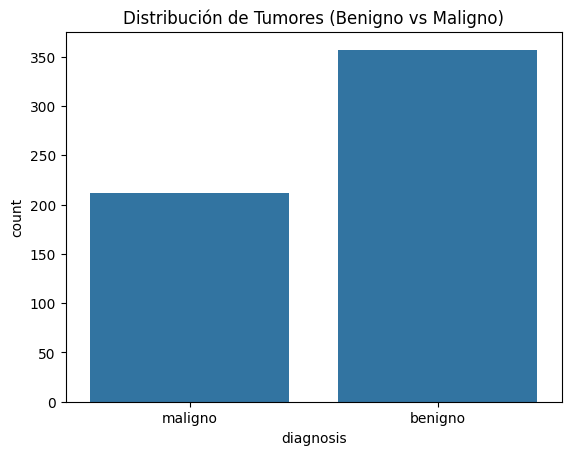

In [ ]:
# Visualización de la distribución
sns.countplot(data=df, x='diagnosis')
plt.title("Distribución de Tumores (Benigno vs Maligno)")
plt.show()

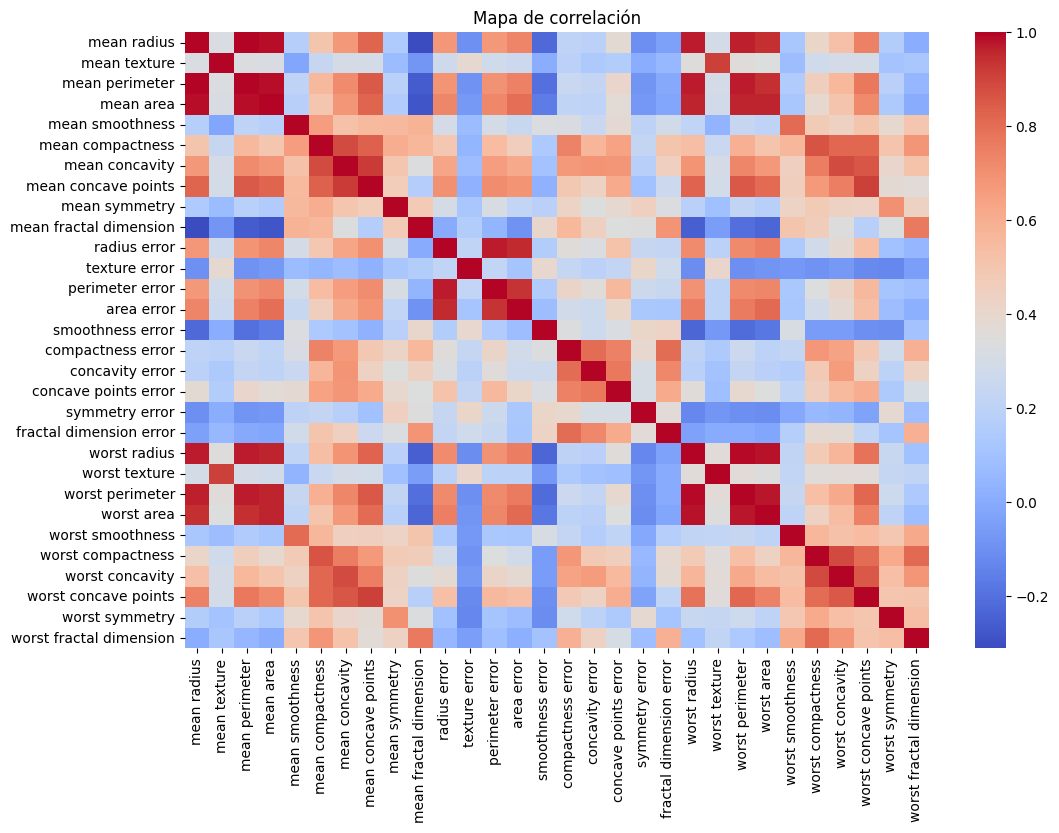

In [ ]:
# Mapa de correlación
plt.figure(figsize=(12,8))
sns.heatmap(df.iloc[:, :-1].corr(), cmap='coolwarm')
plt.title("Mapa de correlación")
plt.show()

In [ ]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Escalado
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


===== Resultados: Regresión Logística =====
              precision    recall  f1-score   support

     benigno       0.96      0.99      0.97        90
     maligno       0.98      0.92      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



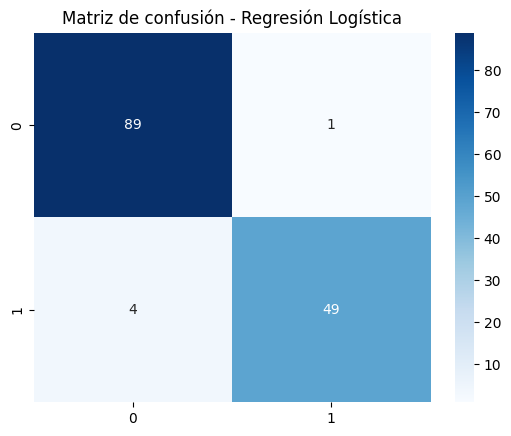


===== Resultados: SVM =====
              precision    recall  f1-score   support

     benigno       0.96      1.00      0.98        90
     maligno       1.00      0.92      0.96        53

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



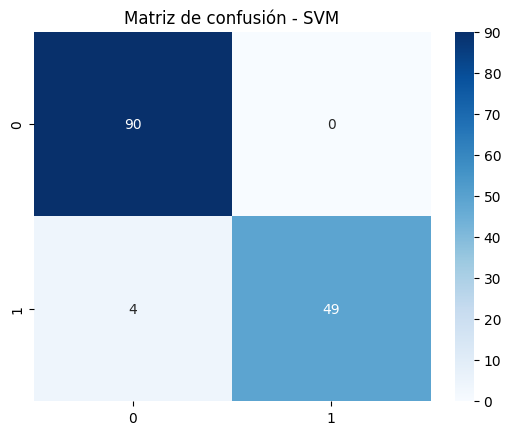


===== Resultados: Random Forest =====
              precision    recall  f1-score   support

     benigno       0.94      1.00      0.97        90
     maligno       1.00      0.89      0.94        53

    accuracy                           0.96       143
   macro avg       0.97      0.94      0.95       143
weighted avg       0.96      0.96      0.96       143



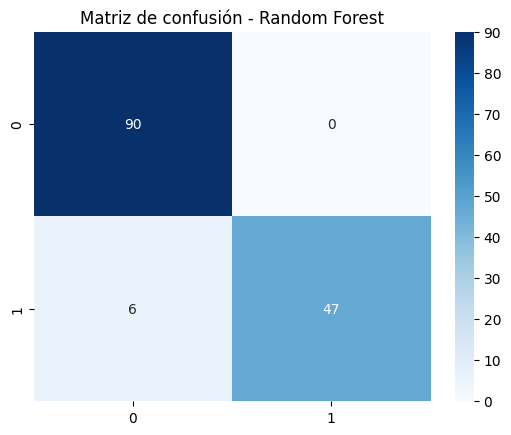

In [ ]:
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=300),
    "SVM": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)

    resultados[nombre] = {
        "accuracy": accuracy_score(y_test, pred),
        "precision": precision_score(y_test, pred, pos_label="benigno"),
        "recall": recall_score(y_test, pred, pos_label="benigno"),
        "f1": f1_score(y_test, pred, pos_label="benigno")
    }

    print("\n===== Resultados:", nombre, "=====")
    print(classification_report(y_test, pred))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de confusión - {nombre}")
    plt.show()

In [ ]:
resultados_df = pd.DataFrame(resultados).T
print("\n📌 Comparación de resultados")
display(resultados_df)


📌 Comparación de resultados


,accuracy,precision,recall,f1
Regresión Logística,0.965035,0.956989,0.988889,0.972678
SVM,0.972028,0.957447,1.000000,0.978261
Random Forest,0.958042,0.937500,1.000000,0.967742


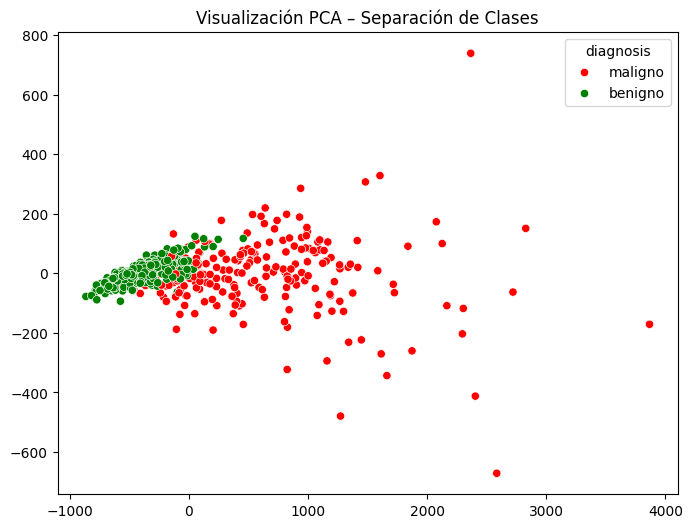

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['diagnosis'], palette=["red","green"])
plt.title("Visualización PCA – Separación de Clases")
plt.show()